In [ ]:
# PROJECT 5-Churn Modelling Encoder

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
data=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
x=data.iloc[:, 3:-1].values

In [ ]:
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
y=data.iloc[:,-1].values

In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:, 2]=le.fit_transform(x[:, 2])

In [ ]:
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [ ]:
#model 1
model1=Sequential()
model1.add(Dense(units=3,activation='relu'))
model1.add(Dense(units=6,activation='relu'))
model1.add(Dense(units=9,activation='relu'))
model1.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 39        
                                                                 
 dense_5 (Dense)             (None, 6)                 24        
                                                                 
 dense_6 (Dense)             (None, 9)                 63        
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
235/235 [==============================] - 3s 5ms/step - loss: 0.4302 - accuracy: 0.7977 - val_loss: 0.4272 - val_accuracy: 0.7920
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4282 - accuracy: 0.7977 - val_loss: 0.4259 - val_accuracy: 0.7920
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.4269 - accuracy: 0.7977 - val_loss: 0.4241 - val_accuracy: 0.7920
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4255 - accuracy: 0.7977 - val_loss: 0.4230 - val_accuracy: 0.7920
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4242 - accuracy: 0.8083 - val_loss: 0.4219 - val_accuracy: 0.8144
Epoch 6/100
235/235 [==============================] - 2s 6ms/step - loss: 0.4229 - accuracy: 0.8101 - val_loss: 0.4201 - val_accuracy: 0.8144
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.4215 - accuracy: 0.8112 - val_loss: 0.4185 - val_accuracy: 0.8192

In [ ]:
mod_loss1=pd.DataFrame(model1.history.history)
mod_loss1

,loss,accuracy,val_loss,val_accuracy
0,0.430236,0.797733,0.427199,0.7920
1,0.428245,0.797733,0.425892,0.7920
2,0.426871,0.797733,0.424113,0.7920
3,0.425506,0.797733,0.422985,0.7920
4,0.424209,0.808267,0.421868,0.8144
...,...,...,...,...
95,0.396984,0.838133,0.400356,0.8376
96,0.397388,0.836933,0.400518,0.8396
97,0.397054,0.837600,0.400019,0.8384
98,0.396500,0.839067,0.399407,0.8372


<Axes: >

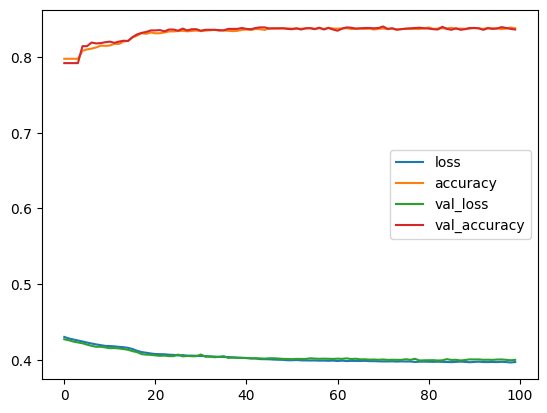

In [ ]:
mod_loss1.plot()

In [ ]:
y_pred_nn1 = (model1.predict(x_test) > 0.5).astype(int)

79/79 [==============================] - 0s 1ms/step


In [ ]:
# Check score
from sklearn.metrics import classification_report,f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_absolute_error,mean_squared_error, r2_score, mean_absolute_percentage_error
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_nn1),'\n')
print('f1_score:\n',f1_score(y_test, y_pred_nn1),'\n')
print('accuracy_score:\n',accuracy_score(y_test, y_pred_nn1),'\n')
print('precision_score:\n',precision_score(y_test, y_pred_nn1),'\n')
print('recall_score:\n',recall_score(y_test, y_pred_nn1),'\n')
print('mean_absolute_error:\n',mean_absolute_error(y_test, y_pred_nn1),'\n')
print('mean_absolute_percentage_error:\n',mean_absolute_percentage_error(y_test, y_pred_nn1),'\n')
print('mean_squared_error:\n',mean_squared_error(y_test, y_pred_nn1),'\n')
print('R2 score:\n',r2_score(y_test, y_pred_nn1))

Confusion Matrix:
 [[1395  585]
 [ 337  183]] 

f1_score:
 0.2841614906832298 

accuracy_score:
 0.6312 

precision_score:
 0.23828125 

recall_score:
 0.35192307692307695 

mean_absolute_error:
 0.3688 

mean_absolute_percentage_error:
 1053842312804696.1 

mean_squared_error:
 0.3688 

R2 score:
 -1.2387334887334887


In [ ]:
#model 2
model=Sequential()
model.add(Dense(units=3,activation='relu'))
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=9,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
235/235 [==============================] - 3s 5ms/step - loss: 0.5460 - accuracy: 0.7969 - val_loss: 0.4998 - val_accuracy: 0.7920
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4831 - accuracy: 0.7977 - val_loss: 0.4761 - val_accuracy: 0.7920
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4627 - accuracy: 0.7980 - val_loss: 0.4567 - val_accuracy: 0.7936
Epoch 4/100
235/235 [==============================] - 2s 6ms/step - loss: 0.4484 - accuracy: 0.8019 - val_loss: 0.4435 - val_accuracy: 0.7980
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4381 - accuracy: 0.8043 - val_loss: 0.4334 - val_accuracy: 0.8004
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4291 - accuracy: 0.8087 - val_loss: 0.4238 - val_accuracy: 0.8052
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4178 - accuracy: 0.8124 - val_loss: 0.4124 - val_accuracy: 0.8060

In [ ]:
mod_loss2=pd.DataFrame(model.history.history)
mod_loss2

,loss,accuracy,val_loss,val_accuracy
0,0.545975,0.796933,0.499830,0.7920
1,0.483112,0.797733,0.476078,0.7920
2,0.462712,0.798000,0.456727,0.7936
3,0.448367,0.801867,0.443492,0.7980
4,0.438052,0.804267,0.433394,0.8004
...,...,...,...,...
95,0.337500,0.863067,0.334378,0.8632
96,0.336523,0.861067,0.333046,0.8644
97,0.336125,0.862133,0.332972,0.8636
98,0.337193,0.862000,0.335354,0.8640


<Axes: >

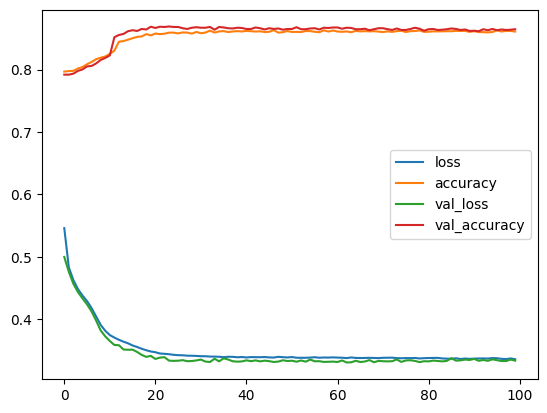

In [ ]:
mod_loss2.plot()

In [ ]:
y_pred_nn2 = (model.predict(x_test) > 0.5).astype(int)

79/79 [==============================] - 0s 2ms/step


In [ ]:
# Check score
from sklearn.metrics import classification_report,f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_absolute_error,mean_squared_error, r2_score, mean_absolute_percentage_error
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_nn2),'\n')
print('f1_score:\n',f1_score(y_test, y_pred_nn2),'\n')
print('accuracy_score:\n',accuracy_score(y_test, y_pred_nn2),'\n')
print('precision_score:\n',precision_score(y_test, y_pred_nn2),'\n')
print('recall_score:\n',recall_score(y_test, y_pred_nn2),'\n')
print('mean_absolute_error:\n',mean_absolute_error(y_test, y_pred_nn2),'\n')
print('mean_absolute_percentage_error:\n',mean_absolute_percentage_error(y_test, y_pred_nn2),'\n')
print('mean_squared_error:\n',mean_squared_error(y_test, y_pred_nn2),'\n')
print('R2 score:\n',r2_score(y_test, y_pred_nn2))

Confusion Matrix:
 [[1922   58]
 [ 280  240]] 

f1_score:
 0.58679706601467 

accuracy_score:
 0.8648 

precision_score:
 0.8053691275167785 

recall_score:
 0.46153846153846156 

mean_absolute_error:
 0.1352 

mean_absolute_percentage_error:
 104483511354995.61 

mean_squared_error:
 0.1352 

R2 score:
 0.1792929292929294


In [ ]:
# CONCLUSION:- Model 2 is more efficient